#**COMPUTER VISION ON IMAGE CLASSIFICATION OF FRUITS**

#**Introduction**

In this project, I developed a Convolutional Neural Network (CNN) model to classify images of fruits into three categories:

1.   Strawberry
2.   Pomegranate
3.   Peach

The objective was to create an accurate classifier that could distinguish between different types of fruits.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re
import os


These libraries are commonly used in data analysis, manipulation, and file system operations in Python programming.

In [2]:
# Importing my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Labelling**

Firstly, I defined regular expressions (regex) patterns to identify filenames corresponding to different categories of fruits: **peach, pomegranate, and strawberry**. Then, a function named "categorize_fruit" was defined to categorize fruits based on their filenames.

In [3]:
# Define a regular expression for each fruit category

peach_pattern = r"\b(fresh_peach)"
pomegranate_pattern = r"\b(fresh_pomegranate)"
strawberry_pattern = r"\b(fresh_strawberry)"


# Define a function to categorize fruits based on the filename

def categorize_fruit(item):
    if re.search(peach_pattern, item, re.IGNORECASE):
        return 'Peach'
    elif re.search(pomegranate_pattern, item, re.IGNORECASE):
        return 'Pomegranate'
    elif re.search(strawberry_pattern, item, re.IGNORECASE):
        return 'Strawberry'

    else:
        return 'Other'

In [4]:
# Where all the files are located in my Google drive

data_path = '/content/drive/MyDrive/fruits'

####**Looping through all the filename to get each fruit category**

These codes create an empty list called data, iterates over the filenames in a specified directory using os.listdir(), categorizes each filename using a hypothetical categorize_fruit() function, and appends the filename and its category to the data list. At the end of the loop, data will contain a list of lists, where each inner list contains the filename and its corresponding category.

In [5]:
# Create an empty list
data = []

# Looping through filename
for filename in os.listdir(data_path):
  category = categorize_fruit(filename)
  data.append([filename, category])

In [6]:
# Converting the data to a dataframe

df = pd.DataFrame(data, columns = ['Filename', 'Category'])

In [7]:
# Checking the first 5 rows of our dataframe

df.head()

,Filename,Category
0,fresh_peach_1.jpg,Peach
1,fresh_peach_103.jpg,Peach
2,fresh_peach_106.jpg,Peach
3,fresh_peach_10.jpg,Peach
4,fresh_peach_108.jpg,Peach


In [37]:
# Checking the last 5 rows of our dataframe

df.tail()

,Filename,Category
816,fresh_peach_13.jpg,Peach
817,fresh_strawberry_19.jpg,Strawberry
818,fresh_strawberry_123.jpg,Strawberry
819,fresh_pomegranate_89.jpg,Pomegranate
820,fresh_pomegranate_85.jpg,Pomegranate


In [8]:
# Checking the value count of each fruit category

df.Category.value_counts()

Category
Pomegranate    311
Strawberry     260
Peach          250
Name: count, dtype: int64

In [9]:
# Checking the shape of our dataframe

df.shape

(821, 2)

In [10]:
# Checking the categories of out dataframe

df.Category.unique()

array(['Peach', 'Pomegranate', 'Strawberry'], dtype=object)

#**Image Preprocessing**

The dataset consisted of labeled images of strawberries, pomegranates, and peaches.
Images were resized to a standard size (e.g., 224x224 pixels) to ensure uniformity across the dataset.
Data augmentation techniques such as rotation, horizontal flip, and zoom were applied to increase the diversity of the training dataset and prevent overfitting.

In [11]:
# Importing necessary libraries

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# Creating our image directory

images_dir = data_path

These lines of code define a configuration for data augmentation using the ImageDataGenerator class, which will preprocess and augment image data for training the machine learning model. The configuration includes rescaling pixel values, applying rotation, shifting horizontally and vertically, shearing, zooming, horizontal flipping, filling mode, and splitting data for validation.

In [13]:
# Data augmentation configuration

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2)

These lines of code create data generators for training and validation data using the flow_from_dataframe method, which reads image file paths and labels from a DataFrame. The generators preprocess images, resize them to the specified target size, and batch them for training, while also categorically encoding the labels for classification tasks.

In [14]:
# Create data generators

train_generator = train_datagen.flow_from_dataframe(
    dataframe = df,
    directory = images_dir,
    x_col = 'Filename',
    y_col = 'Category',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'training',
    seed = 42)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe = df,
    directory = images_dir,
    x_col = 'Filename',
    y_col = 'Category',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation',
    seed = 42)

Found 657 validated image filenames belonging to 3 classes.
Found 164 validated image filenames belonging to 3 classes.


#**Model Configuration**

I designed a CNN architecture consisting of convolutional layers, pooling layers, and fully connected layers.

1.   Convolutional layers extract features from input images using learnable filters.
2.   Pooling layers reduce the spatial dimensions of feature maps while retaining important information.
3.   Fully connected layers combine extracted features to make predictions.



In [16]:
# Importing necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [17]:
# The Convolutional Neural Network (CNN) configuration

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

This line of code prints a summary of the model architecture, including the layers, output shapes, and total number of parameters.

In [18]:
# Checking the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

#**Training The Custom Model**

1.   I split the dataset into training and testing sets **(i.e. 80-20 split)**.
2.   The model was trained using the training set with a **categorical cross-entropy** loss function and the **Adam optimizer**.
3.   During training, I monitored metrics such as accuracy and loss on both the training and validation sets to assess model performance.


In [19]:
# Compiling the model before training
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
# Training the model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
42/42 [==============================] - 224s 5s/step - loss: 1.1522 - accuracy: 0.4368 - val_loss: 0.8354 - val_accuracy: 0.6829
Epoch 2/10
42/42 [==============================] - 50s 1s/step - loss: 0.6663 - accuracy: 0.7428 - val_loss: 0.4877 - val_accuracy: 0.8293
Epoch 3/10
42/42 [==============================] - 48s 1s/step - loss: 0.4851 - accuracy: 0.8280 - val_loss: 0.3996 - val_accuracy: 0.8537
Epoch 4/10
42/42 [==============================] - 50s 1s/step - loss: 0.4174 - accuracy: 0.8463 - val_loss: 0.4635 - val_accuracy: 0.8476
Epoch 5/10
42/42 [==============================] - 59s 1s/step - loss: 0.4377 - accuracy: 0.8508 - val_loss: 0.4246 - val_accuracy: 0.8780
Epoch 6/10
42/42 [==============================] - 48s 1s/step - loss: 0.3759 - accuracy: 0.8661 - val_loss: 0.3956 - val_accuracy: 0.8598
Epoch 7/10
42/42 [==============================] - 48s 1s/step - loss: 0.4586 - accuracy: 0.8432 - val_loss: 0.3556 - val_accuracy: 0.8963
Epoch 8/10
42/42 [=

#**Custom Model Evaluation**

I evaluated the model's performance using metrics such as accuracy.
Additionally, I visualized training and validation accuracy and loss graphs to monitor model convergence and identify any overfitting or underfitting issues.



In [21]:
# Evaluate the model on the validation set

import matplotlib.pyplot as plt

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {int(val_accuracy* 100)}%")

11/11 [==============================] - 5s 437ms/step - loss: 0.5191 - accuracy: 0.8110
Validation loss: 0.5191047787666321
Validation accuracy: 81%


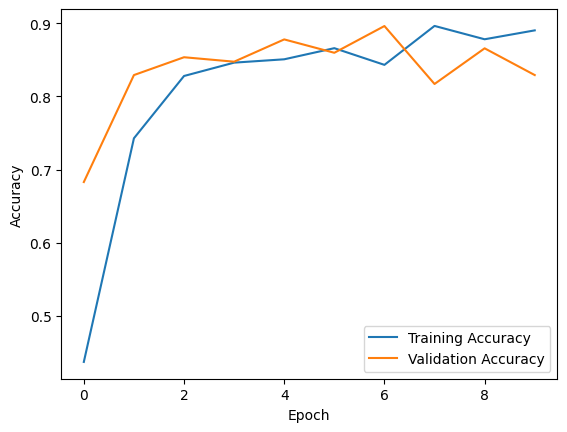

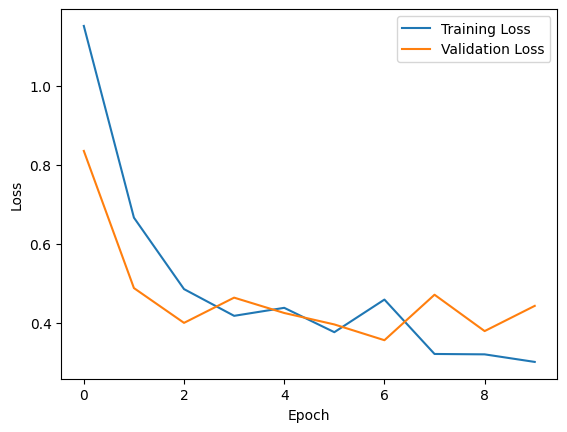

In [54]:
# Plot training and validation accuracy and loss

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#**Predicting Images**

These lines of code creates a function which serves to preprocess an image, pass it through the pre-trained neural network model, and return the predicted category name for the image.

The function provides a convenient way to visualize an image alongside its predicted category. It can be useful for understanding the performance of the model and visually verifying the correctness of predictions.

In [22]:
# Importing necessary libraries

from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image_category(image_path, model):

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0

    # Make a prediction
    prediction = model.predict(img_preprocessed)

    # Assuming your model's classes are accessible via train_generator.class_indices
    # which is a dictionary mapping class names to their indices.

    # We need to invert this dictionary to map indices back to class names.
    label_map = dict((v, k) for k, v in train_generator.class_indices.items())

    # Find the index of the maximum score in the prediction array
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_class_name = label_map[predicted_class_index[0]]

    return predicted_class_name

In [23]:
# Importing necessary libraries

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_image_with_prediction(image_path, model):
    # Predict the image category
    predicted_category = predict_image_category(image_path, model)

    # Load the image for display
    img = image.load_img(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks

    # Add a rectangle for the text background, if desired
    plt.gca().add_patch(Rectangle((0, 0), 120, 30, color='white'))

    # Add the predicted category text
    plt.text(5, 20, predicted_category, color='blue', weight='bold', fontsize=20)

    plt.show()


#**Example Usage 1**

1/1 [==============================] - 0s 36ms/step


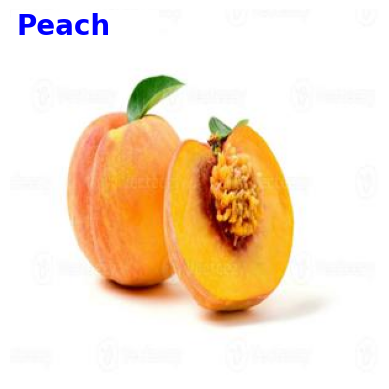

In [49]:
image_path = '/content/drive/MyDrive/fruits/fresh_peach_106.jpg'
display_image_with_prediction(image_path, model)


#**Example Usage 2**

1/1 [==============================] - 0s 52ms/step


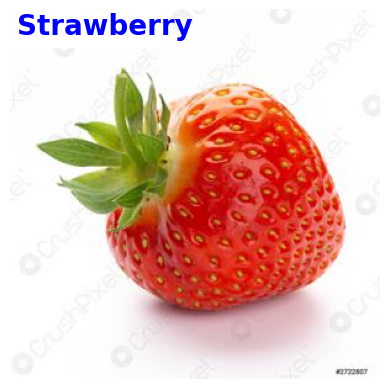

In [31]:
image_path = '/content/drive/MyDrive/fruits/fresh_strawberry_98.jpg'
display_image_with_prediction(image_path, model)

#**Example Usage 3**

1/1 [==============================] - 0s 37ms/step


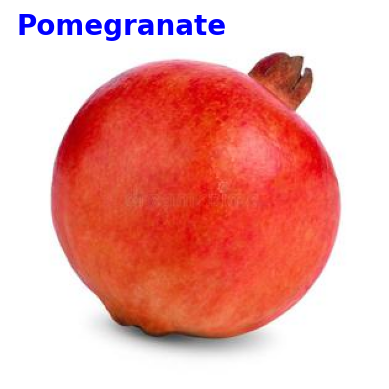

In [53]:
image_path = '/content/drive/MyDrive/fruits/fresh_pomegranate_311.jpg'
display_image_with_prediction(image_path, model)

#**USING A PRE-TRAINED MODEL (Inception V3 Model)**

To improve the model's performance, I employed transfer learning using a pre-trained model (e.g., Inception V3 Model).

1.   I replaced the fully connected layers of the pre-trained model with new layers tailored to our specific fruit classification task.
2.   By leveraging the pre-trained model's learned features, I was able to achieve better classification accuracy with fewer training epochs.



In [34]:
# Import necessary libraries

from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


# Load the base INCEPTION v3 model, excluding its top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze convolutional base model
base_model.trainable = False


# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation = 'relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)


# Create the new model to be trained
new_model = Model(inputs = base_model.input, outputs = predictions)


# Calculate class weights to address class imbalance
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                classes= np.unique(train_generator.classes),
                y= train_generator.classes)

class_weights = dict(enumerate(class_weights))


# Compile the new model
new_model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])


# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)


# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2)


# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df,
    directory = images_dir,
    x_col = 'Filename',
    y_col = 'Category',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'training',
    seed = 42)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe = df,
    directory = images_dir,
    x_col = 'Filename',
    y_col  ='Category',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation',
    seed = 42)

87910968/87910968 [==============================] - 1s 0us/step
Found 657 validated image filenames belonging to 3 classes.
Found 164 validated image filenames belonging to 3 classes.


#**Training The New Model**

1.   I split the dataset into training and testing sets (e.g., 80-20 split).
2.   The model was trained using the training set with a categorical cross-entropy loss function and the Adam optimizer.
3.   During training, I monitored metrics such as accuracy and loss on both the training and validation sets to assess model performance.
4.   I employed early stopping to prevent overfitting by monitoring validation loss and terminating training when it began to increase.

In [35]:
# Train the new model
history2 = new_model.fit(
    train_generator,
    epochs = 5,
    validation_data=validation_generator,
    #class_weight=class_weights,
    callbacks=[early_stopping])

Epoch 1/5
42/42 [==============================] - 130s 3s/step - loss: 0.2587 - accuracy: 0.8950 - val_loss: 0.1267 - val_accuracy: 0.9634
Epoch 2/5
42/42 [==============================] - 144s 3s/step - loss: 0.1030 - accuracy: 0.9559 - val_loss: 0.1091 - val_accuracy: 0.9695
Epoch 3/5
42/42 [==============================] - 134s 3s/step - loss: 0.0849 - accuracy: 0.9665 - val_loss: 0.0984 - val_accuracy: 0.9634
Epoch 4/5
42/42 [==============================] - 116s 3s/step - loss: 0.0731 - accuracy: 0.9665 - val_loss: 0.1437 - val_accuracy: 0.9512
Epoch 5/5
42/42 [==============================] - 131s 3s/step - loss: 0.0871 - accuracy: 0.9680 - val_loss: 0.1248 - val_accuracy: 0.9695


#**New Model Evaluation**

I evaluated the model's performance using metrics such as accuracy.
Additionally, I visualized training and validation accuracy and loss graphs to monitor model convergence and identify any overfitting or underfitting issues.

In [58]:
# Evaluate the new model
val_loss, val_accuracy = new_model.evaluate(validation_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {int(val_accuracy* 100)}%")

11/11 [==============================] - 24s 2s/step - loss: 0.1386 - accuracy: 0.9634
Validation loss: 0.13863900303840637
Validation accuracy: 96%


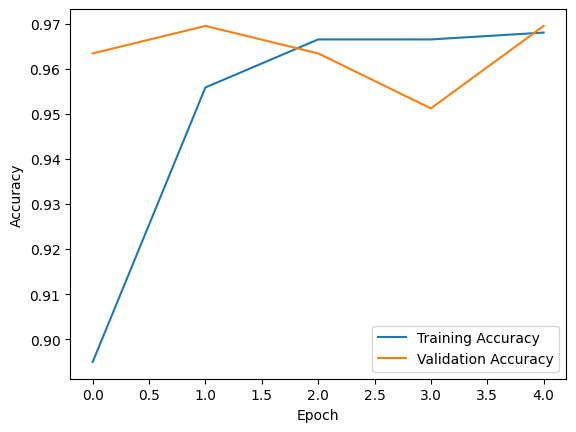

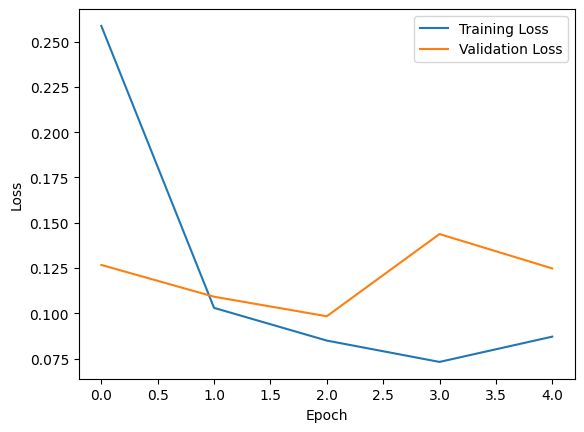

In [57]:
# Plot training and validation accuracy and loss

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#**Predicting Images With The New Model**

In [41]:
#Creating New model Functions

def predict_image_cat(image_path, new_model):

    # Load and preprocess the image
    img2 = image.load_img(image_path, target_size=(224, 224))
    img_array2 = image.img_to_array(img2)
    img_array_expanded_dims2 = np.expand_dims(img_array2, axis=0)
    img_preprocessed2 = img_array_expanded_dims2 / 255.0

    # Make a prediction
    new_model_prediction = new_model.predict(img_preprocessed2)

    # Assuming your model's classes are accessible via train_generator.class_indices
    # which is a dictionary mapping class names to their indices.

    # We need to invert this dictionary to map indices back to class names.
    label_map = dict((v, k) for k, v in train_generator.class_indices.items())

    # Find the index of the maximum score in the prediction array
    predicted_class_index2 = np.argmax(new_model_prediction, axis=1)
    predicted_class_name2 = label_map[predicted_class_index2[0]]

    return predicted_class_name2

In [42]:
def display_image_prediction_cat(image_path, new_model):

    # Predict the image category
    predicted_category2 = predict_image_category(image_path, new_model)

    # Load the image for display
    img2 = image.load_img(image_path)

    # Display the image
    plt.imshow(img2)
    plt.axis('off')  # Turn off axis numbers and ticks

    # Add a rectangle for the text background, if desired
    plt.gca().add_patch(Rectangle((0, 0), 120, 30, color='white'))

    # Add the predicted category text
    plt.text(5, 20, predicted_category2, color='blue', weight='bold', fontsize=20)

    plt.show()

#**Example Usage 1**

1/1 [==============================] - 0s 170ms/step


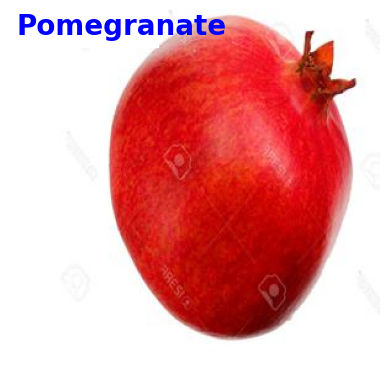

In [46]:
image_path = '/content/drive/MyDrive/fruits/fresh_pomegranate_99.jpg'
display_image_prediction_cat(image_path, new_model)

#**Example Usage 2**

1/1 [==============================] - 0s 148ms/step


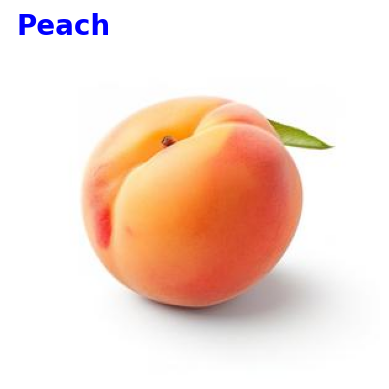

In [44]:
image_path = '/content/drive/MyDrive/fruits/fresh_peach_104.jpg'
display_image_prediction_cat(image_path, new_model)

#**Example Usage 3**

1/1 [==============================] - 0s 200ms/step


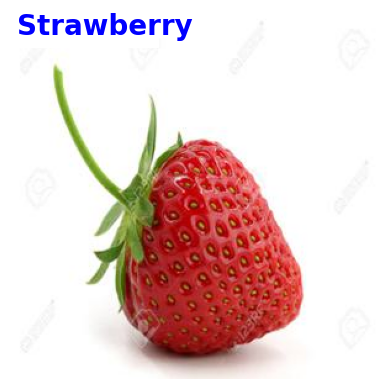

In [52]:
image_path = '/content/drive/MyDrive/fruits/fresh_strawberry_14.jpg'
display_image_prediction_cat(image_path, new_model)

#**Results and Discussions**

1.   The CNN model achieved an **accuracy of 81%** on the testing set, demonstrating its effectiveness in classifying fruit images.
2.   Transfer learning using pre-trained model significantly improved classification accuracy, with the model achieving an **accuracy of 96%**.
3.   Data augmentation techniques played a crucial role in preventing overfitting and improving model generalization.
4.   Challenges faced during model training included addressing overfitting, selecting an appropriate architecture, and fine-tuning hyperparameters. These challenges were overcome by employing regularization techniques.



In conclusion, I successfully developed a CNN model for fruit classification with high accuracy.
Transfer learning and data augmentation were instrumental in enhancing model performance and robustness.
Future work could involve fine-tuning hyperparameters further, exploring additional data augmentation techniques, and deploying the model in real-world applications.